<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

# Lab 8.4: Sentiment Analysis

This lab performs sentiment analysis on sentiment-labelled sentences using two types of feature extraction - a count vectoriser and TF-IDF vectoriser.

Based on the video tutorial **Text Classification with Machine Learning,SpaCy and Scikit(Sentiment Analysis)** by **Jesse E. Agbe (JCharis)**.

## Data Source: UCI
### UCI - Machine Learning Repository
- Center for Machine Learning and Intelligent Systems

The [**UCI Machine Learning Repository**](http://archive.ics.uci.edu/about) is a collection of databases, domain theories, and data generators that are used by the machine learning community for the empirical analysis of machine learning algorithms.

### Dataset
- [Sentiment Labelled Sentences Data Set](http://archive.ics.uci.edu/ml/datasets/Sentiment+Labelled+Sentences)

### Abstract
The dataset contains sentences labelled with positive or negative sentiment.

- Data Set Characteristics: Text
- Number of Instances: 3000
- Area: N/A
- Attribute Characteristics: N/A
- Number of Attributes: N/A
- Date Donated: 2015-05-30
- Associated Tasks: Classification
- Missing Values? N/A

### Source
Dimitrios Kotzias dkotzias '@' ics.uci.edu

### Data Set Information
This dataset was created for the Paper 'From Group to Individual Labels using Deep Features', Kotzias et. al,. KDD 2015

Please cite the paper if you want to use it :)

It contains sentences labelled with positive or negative sentiment.

### Format
sentence &lt;tab&gt; score &lt;newline&gt;

### Details
Score is either 1 (for positive) or 0 (for negative)

The sentences come from three different websites/fields:
- imdb.com
- amazon.com
- yelp.com

For each website, there exist **500 positive** and **500 negative** sentences. Those were selected randomly for larger datasets of reviews.

We attempted to select sentences that have a clearly positive or negative connotation, the goal was for no neutral sentences to be selected.

For the full datasets look:

- **imdb**: Maas et. al., 2011 _Learning word vectors for sentiment analysis_
- **amazon**: McAuley et. al., 2013 _Hidden factors and hidden topics: Understanding rating dimensions with review text_
- **yelp**: [Yelp dataset challenge](http://www.yelp.com/dataset_challenge)


### Attribute Information
The attributes are text sentences, extracted from reviews of products, movies, and restaurants

### Relevant Papers
**From Group to Individual Labels using Deep Features**, Kotzias et. al,. KDD 2015

### Citation Request
**From Group to Individual Labels using Deep Features**, Kotzias et. al,. KDD 2015

## Import libraries

In [30]:
## Import Libraries
import pandas as pd

import regex as re
import spacy

%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.model_selection import train_test_split

from sklearn.svm import SVC

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import average_precision_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.naive_bayes import MultinomialNB
import warnings
warnings.filterwarnings('ignore')

## Load data

Load Yelp, Amazon and Imdb Data into dataframes. Create three column names 'text', 'sentiment' and 'source' (equal to one of 'yelp', 'imdb' or 'amazon' for each dataframe).

Hint: Source is separated by tabs and has no headers.

In [2]:
yelp_text = '/Users/tresornoel/Desktop/IOD/DATA/yelp_labelled.txt'
imdb_text = '/Users/tresornoel/Desktop/IOD/DATA/imdb_labelled_fixed.txt'
amazon_text = '/Users/tresornoel/Desktop/IOD/DATA/amazon_cells_labelled.txt'

# ANSWER
# Load Yelp data
yelp_text = '/Users/tresornoel/Desktop/IOD/DATA/yelp_labelled.txt'
yelp_df = pd.read_csv(yelp_text, sep='\t', header=None, names=['text', 'sentiment'])
yelp_df['source'] = 'yelp'

# Load IMDB data
imdb_text = '/Users/tresornoel/Desktop/IOD/DATA/imdb_labelled_fixed.txt'
imdb_df = pd.read_csv(imdb_text, sep='\t', header=None, names=['text', 'sentiment'])
imdb_df['source'] = 'imdb'

# Load Amazon data
amazon_text = '/Users/tresornoel/Desktop/IOD/DATA/amazon_cells_labelled.txt'
amazon_df = pd.read_csv(amazon_text, sep='\t', header=None, names=['text', 'sentiment'])
amazon_df['source'] = 'amazon'


## Inspect the data

Check your datasets.

In [3]:
# ANSWER
# Inspect Yelp Data
print("\nYelp Data Head:\n", yelp_df.head())
print("\nYelp Data Info:\n", yelp_df.info())
print("\nYelp Sentiment Value Counts:\n", yelp_df['sentiment'].value_counts())
print("\nYelp Missing Values:\n", yelp_df.isnull().sum())

# Inspect IMDB Data
print("\nIMDB Data Head:\n", imdb_df.head())
print("\nIMDB Data Info:\n", imdb_df.info())
print("\nIMDB Sentiment Value Counts:\n", imdb_df['sentiment'].value_counts())
print("\nIMDB Missing Values:\n", imdb_df.isnull().sum())

# Inspect Amazon Data
print("\nAmazon Data Head:\n", amazon_df.head())
print("\nAmazon Data Info:\n", amazon_df.info())
print("\nAmazon Sentiment Value Counts:\n", amazon_df['sentiment'].value_counts())
print("\nAmazon Missing Values:\n", amazon_df.isnull().sum())


Yelp Data Head:
                                                 text  sentiment source
0                           Wow... Loved this place.          1   yelp
1                                 Crust is not good.          0   yelp
2          Not tasty and the texture was just nasty.          0   yelp
3  Stopped by during the late May bank holiday of...          1   yelp
4  The selection on the menu was great and so wer...          1   yelp
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   text       1000 non-null   object
 1   sentiment  1000 non-null   int64 
 2   source     1000 non-null   object
dtypes: int64(1), object(2)
memory usage: 23.6+ KB

Yelp Data Info:
 None

Yelp Sentiment Value Counts:
 sentiment
1    500
0    500
Name: count, dtype: int64

Yelp Missing Values:
 text         0
sentiment    0
source       0
dtype: int64

IMDB Data Head:

In [4]:
amazon_df.sample(10)

,text,sentiment,source
789,I can't use this case because the smell is dis...,0,amazon
863,"I have only had it for a few weeks, but so far...",1,amazon
465,The battery works great!,1,amazon
821,"That being said, for a phone, the camera is ve...",1,amazon
222,"Simple, lightweight and great fit.",1,amazon
571,This fixes all the problems.,1,amazon
606,"Overall, I would recommend this phone over the...",1,amazon
85,The headsets are easy to use and everyone love...,1,amazon
790,NOT WHAT I WANTED.,0,amazon
506,I would not recommend this item to anyone.,0,amazon


In [5]:
# Set the maximum column width to a larger value
pd.set_option('display.max_colwidth', 1000)

In [6]:
imdb_df.head()

,text,sentiment,source
0,"A very, very, very slow-moving, aimless movie about a distressed, drifting young man.",0,imdb
1,"Not sure who was more lost - the flat characters or the audience, nearly half of whom walked out.",0,imdb
2,"Attempting artiness with black & white and clever camera angles, the movie disappointed - became even more ridiculous - as the acting was poor and the plot and lines almost non-existent.",0,imdb
3,Very little music or anything to speak of.,0,imdb
4,The best scene in the movie was when Gerardo is trying to find a song that keeps running through his head.,1,imdb


## Merge the data

Merge all three datasets.

In [7]:
# ANSWER
df = pd.concat([yelp_df, imdb_df, amazon_df], ignore_index=True)
df.head()

,text,sentiment,source
0,Wow... Loved this place.,1,yelp
1,Crust is not good.,0,yelp
2,Not tasty and the texture was just nasty.,0,yelp
3,Stopped by during the late May bank holiday off Rick Steve recommendation and loved it.,1,yelp
4,The selection on the menu was great and so were the prices.,1,yelp


## Prepare the stage
- Load spaCy

In [8]:
nlp = spacy.load('en_core_web_sm')

## Prepare the text
All the text handling and preparation concerned with the changes and modifications from the raw source text to a format that will be used for the actual processing, things like:
- handle encoding
- handle extraneous and international characters
- handle symbols
- handle metadata and embedded information
- handle repetitions (such multiple spaces or newlines)

Clean text.

In [9]:
def clean_text(text):
    # reduce multiple spaces and newlines to only one
    text = re.sub(r'(\s\s+|\n\n+)', r'\1', text)
    # remove double quotes
    text = re.sub(r'"', '', text)

    return text

In [10]:
# Apply the clean_text function to your dataset.
# ANSWER
df['text'] = df['text'].apply(clean_text)
print(df.head())

                                                                                      text  \
0                                                                 Wow... Loved this place.   
1                                                                       Crust is not good.   
2                                                Not tasty and the texture was just nasty.   
3  Stopped by during the late May bank holiday off Rick Steve recommendation and loved it.   
4                              The selection on the menu was great and so were the prices.   

   sentiment source  
0          1   yelp  
1          0   yelp  
2          0   yelp  
3          1   yelp  
4          1   yelp  


In [11]:
pd.set_option('display.max_colwidth', 1000)

In [12]:
df.sample(10)

,text,sentiment,source
2205,"great headset, very impressed - H500.",1,amazon
2534,Great case and price!,1,amazon
502,Cant say enough good things about this place.,1,yelp
1736,That was done in the second movie.,0,imdb
1710,The stories were as unbelievable as the actors.,0,imdb
590,Great place fo take out or eat in.,1,yelp
299,The food was excellent and service was very good.,1,yelp
292,"The staff is great, the food is delish, and they have an incredible beer selection.",1,yelp
2434,But it does get better reception and clarity than any phone I've had before.,1,amazon
527,"Be sure to order dessert, even if you need to pack it to-go - the tiramisu and cannoli are both to die for.",1,yelp


In [13]:
# df[3:]
df.iloc[1002]

text         Attempting artiness with black & white and clever camera angles, the movie disappointed - became even more ridiculous - as the acting was poor and the plot and lines almost non-existent.  
sentiment                                                                                                                                                                                               0
source                                                                                                                                                                                               imdb
Name: 1002, dtype: object

In [14]:
# Display row 1003 as a DataFrame
df.iloc[[1002]]

,text,sentiment,source
1002,"Attempting artiness with black & white and clever camera angles, the movie disappointed - became even more ridiculous - as the acting was poor and the plot and lines almost non-existent.",0,imdb


## Work the text
Using techniques learned in previous labs, remove StopWords, punctuation, and digits. Entities can be retained. Return the lemmatised form of any remaining words in lower case form.

This removes meaningless information.

In [15]:
# Complete the function
def convert_text(text):
    '''
    Use techniques learned in previous labs.
    1) Remove StopWords, Punctuation and digits.
    2) Retain entities.
    3) Return the lemmatised form of remaining words in lower case form.
    '''
    
    
    return text

In [16]:
%%time
df['short'] = df['text'].apply(convert_text)

CPU times: user 392 µs, sys: 22 µs, total: 414 µs
Wall time: 401 µs


In [17]:
df.sample(10)

,text,sentiment,source,short
310,Fantastic food!,1,yelp,Fantastic food!
1498,"Initially the local sites in the film, which was filmed here in Buffalo, intrigued me.",1,imdb,"Initially the local sites in the film, which was filmed here in Buffalo, intrigued me."
2991,Painful on the ear.,0,amazon,Painful on the ear.
2852,I have read other's reviews here but I haven't had any problem with it.,1,amazon,I have read other's reviews here but I haven't had any problem with it.
2490,This PDA rocks.,1,amazon,This PDA rocks.
628,I asked multiple times for the wine list and after some time of being ignored I went to the hostess and got one myself.,0,yelp,I asked multiple times for the wine list and after some time of being ignored I went to the hostess and got one myself.
413,I can assure you that you won't be disappointed.,1,yelp,I can assure you that you won't be disappointed.
1345,Babie Bop is very cute.,1,imdb,Babie Bop is very cute.
1550,I don't think there are any redeeming qualities in this remake.,0,imdb,I don't think there are any redeeming qualities in this remake.
1344,is pretty funny.,1,imdb,is pretty funny.


## Split the dataset

In [18]:
# Features and Labels
X = df['short']
y = df['sentiment']

# Apply a train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

## Create a Bag-of-Words Model

In [19]:
# create a matrix of word counts from the text
counts = CountVectorizer()

In [20]:
# do the actual counting
A = counts.fit_transform(X_train, y_train)

In [21]:
# create a classifier using SVC
classifier = SVC(kernel='linear', probability=True)

In [22]:
# train the classifier with the training data
classifier.fit(A, y_train)

SVC(kernel='linear', probability=True)

In [23]:
# do the transformation for the test data
# NOTE: use `transform()` instead of `fit_transform()`
B = counts.transform(X_test)

In [24]:
# make predictions based on the test data
predictions = classifier.predict(B)

# store probabilities of predictions being 1
probabilities = classifier.predict_proba(B)[:, 1]

In [25]:
# check the accuracy
print('Accuracy: %.4f' % accuracy_score(y_test, predictions))

Accuracy: 0.8167


## Repeat using TF-IDF
TF-IDF = Term Frequency - Inverse Document Frequency

In [26]:
# create a matrix of word counts from the text
# use TF-IDF
tfidf = TfidfVectorizer()
# do the actual counting
A = tfidf.fit_transform(X_train, y_train)

# train the classifier with the training data
classifier.fit(A, y_train)

# do the transformation for the test data
# NOTE: use `transform()` instead of `fit_transform()`
B = tfidf.transform(X_test)

# make predictions based on the test data
predictions = classifier.predict(B)

# store probabilities of predictions being 1
probabilities = classifier.predict_proba(B)[:, 1]

# check the accuracy
print('Accuracy: %.4f' % accuracy_score(y_test, predictions))

Accuracy: 0.8333


## Defining a helper function to show results and charts

In [27]:

def show_summary_report(actual, prediction, probabilities):

    if isinstance(actual, pd.Series):
        actual = actual.values.astype(int)
    prediction = prediction.astype(int)

    accuracy_ = accuracy_score(actual, prediction)
    precision_ = precision_score(actual, prediction)
    recall_ = recall_score(actual, prediction)
    roc_auc_ = roc_auc_score(actual, probabilities)

    print('Accuracy : %.4f [TP / N] Proportion of predicted labels that match the true labels. Best: 1, Worst: 0' % accuracy_)
    print('Precision: %.4f [TP / (TP + FP)] Not to label a negative sample as positive.        Best: 1, Worst: 0' % precision_)
    print('Recall   : %.4f [TP / (TP + FN)] Find all the positive samples.                     Best: 1, Worst: 0' % recall_)
    print('ROC AUC  : %.4f                                                                     Best: 1, Worst: < 0.5' % roc_auc_)
    print('-' * 107)
    print('TP: True Positives, FP: False Positives, TN: True Negatives, FN: False Negatives, N: Number of samples')

    # Confusion Matrix
    mat = confusion_matrix(actual, prediction)

    # Precision/Recall
    precision, recall, _ = precision_recall_curve(actual, probabilities)
    average_precision = average_precision_score(actual, probabilities)

    # Compute ROC curve and ROC area
    fpr, tpr, _ = roc_curve(actual, probabilities)
    roc_auc = auc(fpr, tpr)


    # plot
    fig, ax = plt.subplots(1, 3, figsize = (18, 6))
    fig.subplots_adjust(left = 0.02, right = 0.98, wspace = 0.2)

    # Confusion Matrix
    sns.heatmap(mat.T, square = True, annot = True, fmt = 'd', cbar = False, cmap = 'Blues', ax = ax[0])

    ax[0].set_title('Confusion Matrix')
    ax[0].set_xlabel('True label')
    ax[0].set_ylabel('Predicted label')

    # Precision/Recall
    step_kwargs = {'step': 'post'}
    ax[1].step(recall, precision, color = 'b', alpha = 0.2, where = 'post')
    ax[1].fill_between(recall, precision, alpha = 0.2, color = 'b', **step_kwargs)
    ax[1].set_ylim([0.0, 1.0])
    ax[1].set_xlim([0.0, 1.0])
    ax[1].set_xlabel('Recall')
    ax[1].set_ylabel('Precision')
    ax[1].set_title('2-class Precision-Recall curve')

    # ROC
    ax[2].plot(fpr, tpr, color = 'darkorange', lw = 2, label = 'ROC curve (AUC = %0.2f)' % roc_auc)
    ax[2].plot([0, 1], [0, 1], color = 'navy', lw = 2, linestyle = '--')
    ax[2].set_xlim([0.0, 1.0])
    ax[2].set_ylim([0.0, 1.0])
    ax[2].set_xlabel('False Positive Rate')
    ax[2].set_ylabel('True Positive Rate')
    ax[2].set_title('Receiver Operating Characteristic')
    ax[2].legend(loc = 'lower right')

    plt.show()

    return (accuracy_, precision_, recall_, roc_auc_)

## Repeating it all for comparison
Repeat the whole lot in one big block using the show_summary_report function.

Find 'Accuracy', 'Precision', 'Recall', 'ROC_AUC' using CountVectorizer and TfidfVectorizer and keep the result in a dataframe.


Evaluating CountVectorizer...
Accuracy : 0.8000 [TP / N] Proportion of predicted labels that match the true labels. Best: 1, Worst: 0
Precision: 0.8014 [TP / (TP + FP)] Not to label a negative sample as positive.        Best: 1, Worst: 0
Recall   : 0.7793 [TP / (TP + FN)] Find all the positive samples.                     Best: 1, Worst: 0
ROC AUC  : 0.8844                                                                     Best: 1, Worst: < 0.5
-----------------------------------------------------------------------------------------------------------
TP: True Positives, FP: False Positives, TN: True Negatives, FN: False Negatives, N: Number of samples


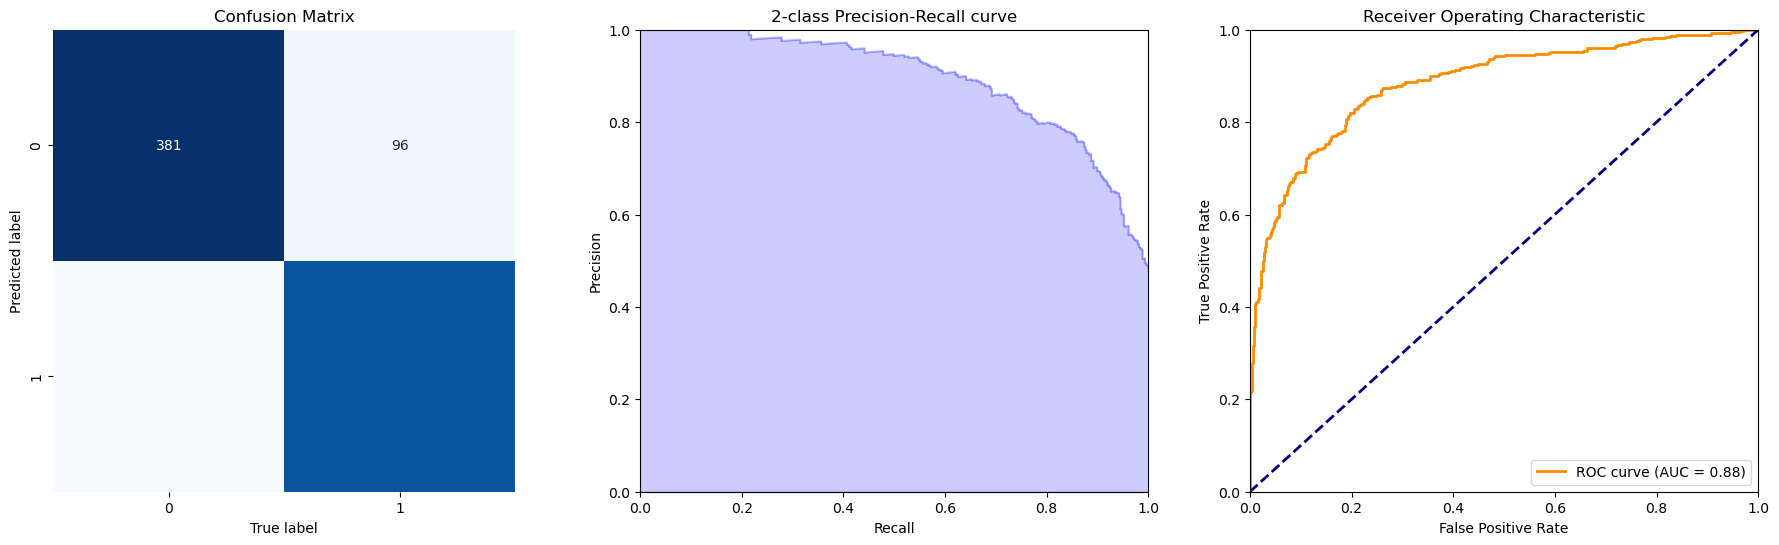


Evaluating TfidfVectorizer...
Accuracy : 0.8056 [TP / N] Proportion of predicted labels that match the true labels. Best: 1, Worst: 0
Precision: 0.7968 [TP / (TP + FP)] Not to label a negative sample as positive.        Best: 1, Worst: 0
Recall   : 0.8023 [TP / (TP + FN)] Find all the positive samples.                     Best: 1, Worst: 0
ROC AUC  : 0.8916                                                                     Best: 1, Worst: < 0.5
-----------------------------------------------------------------------------------------------------------
TP: True Positives, FP: False Positives, TN: True Negatives, FN: False Negatives, N: Number of samples


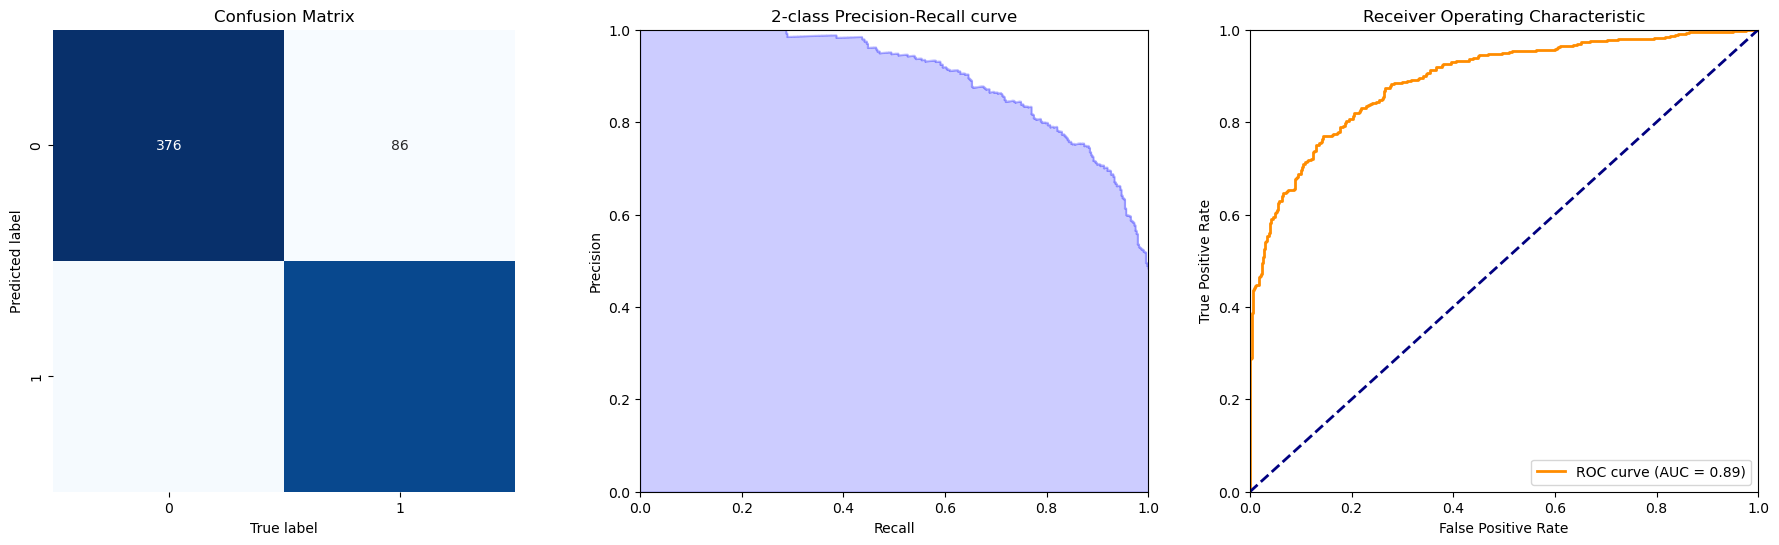

        Vectorizer  Accuracy  Precision    Recall   ROC_AUC
0  CountVectorizer  0.800000   0.801418  0.779310  0.884435
1  TfidfVectorizer  0.805556   0.796804  0.802299  0.891613


In [32]:
# ANSWER

# Sample text data and labels (replace with your actual dataset)
texts = df['text'].tolist()
labels = df['sentiment'].tolist()

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(texts, labels, test_size=0.3, random_state=42)

# Vectorizers
vectorizers = {
    'CountVectorizer': CountVectorizer(),
    'TfidfVectorizer': TfidfVectorizer()
}

# Model
model = MultinomialNB()


# DataFrame to store the results
results = pd.DataFrame(columns=['Vectorizer', 'Accuracy', 'Precision', 'Recall', 'ROC_AUC'])

# Loop over the vectorizers
for name, vectorizer in vectorizers.items():
    print(f"\nEvaluating {name}...")
    
    # Transform the data
    X_train_vec = vectorizer.fit_transform(X_train)
    X_test_vec = vectorizer.transform(X_test)
    
    # Fit the model
    model.fit(X_train_vec, y_train)
    
    # Predictions
    predictions = model.predict(X_test_vec)
    probabilities = model.predict_proba(X_test_vec)[:, 1]
    
    # Generate report and plot
    accuracy, precision, recall, roc_auc = show_summary_report(y_test, predictions, probabilities)
    
    # Store the results
    new_row = pd.DataFrame({
        'Vectorizer': [name],
        'Accuracy': [accuracy],
        'Precision': [precision],
        'Recall': [recall],
        'ROC_AUC': [roc_auc]
    })

    # Use pd.concat to add the new row to the results DataFrame
    results = pd.concat([results, new_row], ignore_index=True)

# Display the results
print(results)





---



---



> > > > > > > > > © 2024 Institute of Data


---



---



